In [1]:
import os
import numpy as np
import tensorflow.compat.v1 as tfv1
import tensorflow as tfv2
tfv1.disable_v2_behavior()

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tfv1.reset_default_graph()
    tfv1.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")
dataset = np.array(china, dtype=np.float32)
height, width, channels = dataset.shape
dataset = dataset.reshape([1, height, width, channels])

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

In [5]:
X = tfv1.placeholder(tfv1.float32, shape=(None, height, width, channels))
max_pool = tfv1.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")

with tfv1.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 214, 320, 3)


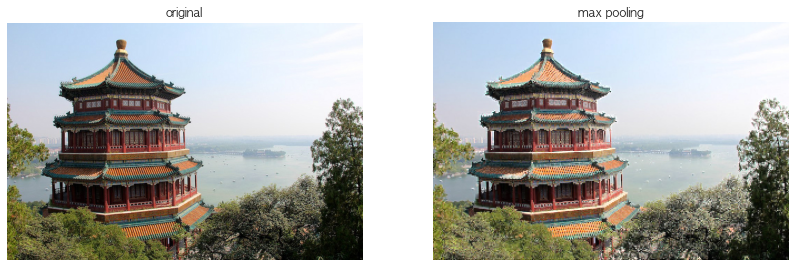

In [6]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    dataset[0],  # original
    output[0],  # max_pooling
]

titles = ['original', 'max pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image.astype(np.uint8))
    axs[i].set_title(title)
    axs[i].axis('off')

In [8]:
reset_graph()

X = tfv1.placeholder(tfv1.float32, shape=(None, height, width, channels))
max_pool = tfv1.layers.max_pooling2d(X, pool_size=2, strides=2, padding='same')

with tfv1.Session() as sess:
    tfv1.global_variables_initializer().run()
    output = sess.run(max_pool, feed_dict={X: dataset})

print('dataset.shape :', dataset.shape)
print('output.shape (after max-pooling) :', output.shape)

dataset.shape : (1, 427, 640, 3)
output.shape (after max-pooling) : (1, 214, 320, 3)


/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/pooling.py:310: UserWarning: `tf.layers.max_pooling2d` is deprecated and will be removed in a future version. Please use `tf.keras.layers.MaxPooling2D` instead.
  warnings.warn('`tf.layers.max_pooling2d` is deprecated and '
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


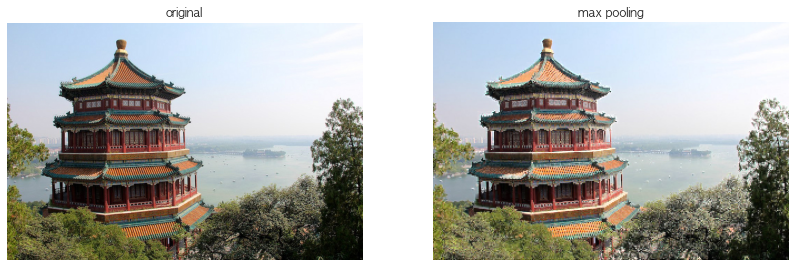

In [9]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    dataset[0],  # original
    output[0],  # max_pooling
]

titles = ['original', 'max pooling']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image.astype(np.uint8))
    axs[i].set_title(title)
    axs[i].axis('off')